In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from env import user, password, host
from prepare import prepare_store_data
import os
# from acquire import wrangle_store_data

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
df = pd.read_csv('tsa_item_demand.csv')

In [3]:
prepare_store_data(df)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX,279.62
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX,13.20
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX,106.78


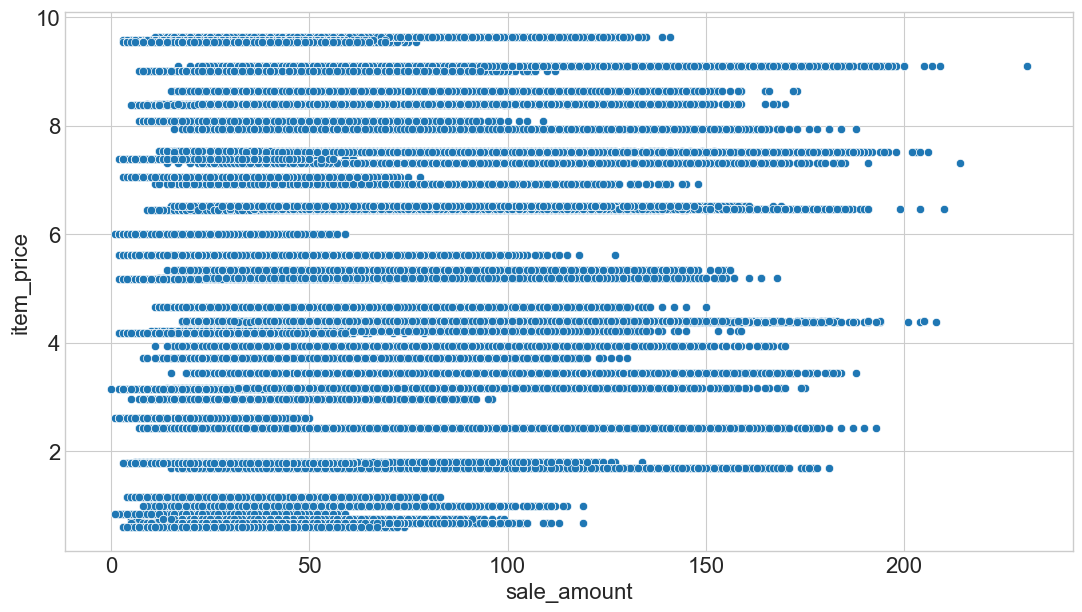

In [4]:
sns.scatterplot(x=df.sale_amount,y=df.item_price)
plt.show()

In [5]:
df.columns

Index(['store_id', 'item_id', 'item_upc14', 'item_upc12', 'item_brand',
       'item_name', 'item_price', 'sale_id', 'sale_date', 'sale_amount',
       'store_address', 'store_zipcode', 'store_city', 'store_state'],
      dtype='object')

In [6]:
#adding month and day of the week
df['month'] = df.sale_date.dt.month
df['weekday'] = df.sale_date.dt.day_name()

# GERMANY DATASET

In [28]:
df = pd.read_csv('germany.csv')

In [29]:
df.columns = df.columns.str.lower()

In [30]:
df.columns

Index(['date', 'consumption', 'wind', 'solar', 'wind+solar'], dtype='object')

In [31]:
df.dtypes

date            object
consumption    float64
wind           float64
solar          float64
wind+solar     float64
dtype: object

In [32]:
df.date = pd.to_datetime(df.date)

In [33]:
df.dtypes

date           datetime64[ns]
consumption           float64
wind                  float64
solar                 float64
wind+solar            float64
dtype: object

In [34]:
def get_hist(df):
    ''' Gets histographs of acquired continuous variables'''
    
    plt.figure(figsize=(16, 3))

    # List of columns
    cols = [col for col in df.columns if col not in ['date']]

    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display histogram for column.
        df[col].hist(bins=5)

        # Hide gridlines.
        plt.grid(False)

        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)

        plt.tight_layout()

    plt.show()
        

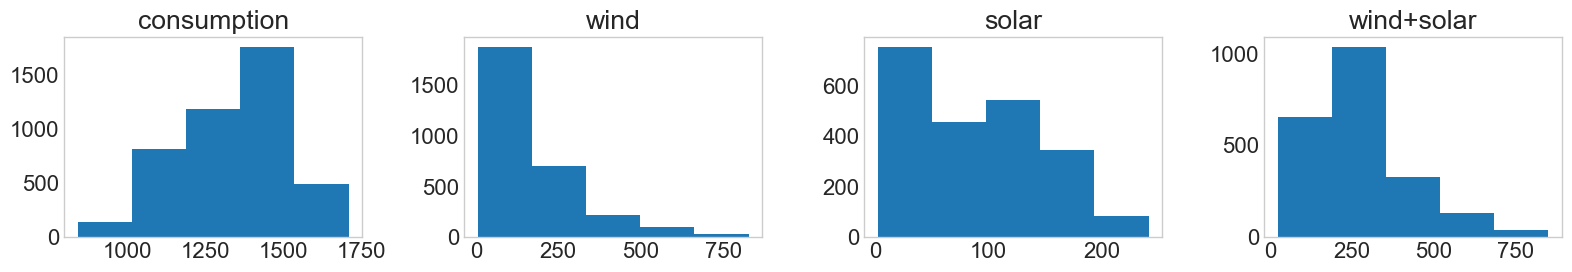

In [35]:
get_hist(df)

In [36]:
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year

In [37]:
df = df.set_index('date').sort_index()

In [38]:
df.isna().sum()

consumption       0
wind           1463
solar          2195
wind+solar     2196
month             0
year              0
dtype: int64

In [41]:
df.groupby('year').sum()

,consumption,wind,solar,wind+solar,month
year,,,,,
2006,489068.53600,0.000,0.000,0.000,2382
2007,496631.84700,0.000,0.000,0.000,2382
2008,495570.87600,0.000,0.000,0.000,2384
2009,459737.42800,0.000,0.000,0.000,2382
2010,488588.70000,35911.777,0.000,0.000,2382
2011,484814.08600,44032.951,0.000,0.000,2382
2012,469574.75400,45862.667,27887.332,73749.999,2384
2013,463336.85300,47197.832,29559.780,76697.443,2382
2014,504164.82100,51107.672,32498.307,83370.502,2382


In [42]:
df.fillna(0)

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


In [43]:
df['wind_solar'] = df.wind + df.solar

In [ ]:
def prep_germany(df):
    df['wind_solar'] = df.wind + df.solar
    df['month'] = df.date.dt.month
    df['year'] = df.date.dt.year
    df = df.set_index('date').sort_index()